<a href="https://colab.research.google.com/github/BS-test-eduacation/OPEN-CV/blob/master/Copy_of_Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# coding=utf-8

# 載入函示庫
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

from keras.models import Sequential
from keras.layers import Dense,Dropout

num_classes = 10

# 模型架構
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# 載入模型
try:
    model.load_weights("mnist.h5")
    print("success")
except:
    print("error")
	
def plot_image(image):
    fig=plt.gcf()
    fig.set_size_inches(2, 2)
    plt.imshow(image,cmap='binary')
    plt.show()

# 讀取樣本
img=np.array(Image.open('test.jpg').convert('L'))
plot_image(img)

# 樣本前處理
x_Test = img.reshape(1,784).astype('float32')
x_Test_normalize = x_Test.astype('float32') / 255.0

# 樣本預測
prediction=model.predict(x_Test_normalize)
print(prediction[0])

prediction=model.predict_classes(x_Test_normalize)
print(prediction[0])

Using TensorFlow backend.


error


FileNotFoundError: ignored

11493376/11490434 [==============================] - 1s 0us/step
60000 train samples
10000 test samples
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_6 (Dense)              (None, 15)                7695      
Total params: 672,271
Trainable params: 672,271
Non-trainable params: 0
_________________________________________________________________
Train on 48000 samples, validate on 12000 samples
Epoch 1/12
48000/48000 [==============================] - 4s 78us/step - loss: 0.2525 - accuracy: 0.9226 - val_loss: 0.1051 - val_accuracy: 0.9691
Epoch 2/12
48000/48000 [==============================] - 2s 45us/step - loss

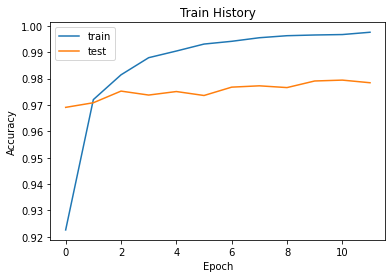

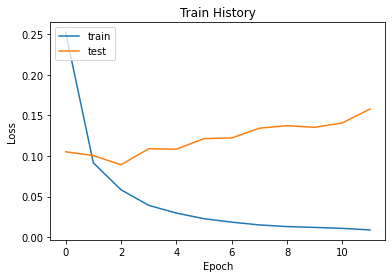

success


In [2]:
# coding=utf-8

# 載入函示庫
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop

batch_size = 128
num_classes = 15
epochs = 12

# 下載mnist範例資料檔分兩部分：訓練資料集x_train, y_train(標記)和測試資料集x_test,y_test
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 資料格式化和正規化
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# 類別轉換成onehot encoding
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# 模型架構
model = Sequential()
# 輸入層
model.add(Dense(512, activation='relu', input_shape=(784,)))
# 隱藏層
model.add(Dense(512, activation='relu'))
# 輸出層
model.add(Dense(num_classes, activation='softmax'))
# 模型架構摘要
model.summary()

# 模型訓練
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

train_history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.2)

# 模型評估
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

import matplotlib.pyplot as plt
def show_train_history(train_type,test_type):
    plt.plot(train_history.history[train_type])
    plt.plot(train_history.history[test_type])
    plt.title('Train History')
    if train_type == 'accuracy':
        plt.ylabel('Accuracy')
    else:
        plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

show_train_history('accuracy','val_accuracy')
show_train_history('loss','val_loss')

# 儲存模型
try:
    model.save_weights("mnist.h5")
    print("success")
except:
    print("error")

# 新增區段